# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Yonvi Satria
- **Email:** satriayonvi20@gmail.com
- **ID Dicoding:** yonvisatria

## Menentukan Pertanyaan Bisnis

1. Bagaimana tren jumlah peminjaman sepeda harian selama dua tahun terakhir, dan faktor apa saja yang memengaruhinya (musim, cuaca, hari kerja/libur)?
2. Bagaimana perbedaan pola perilaku peminjaman antara pengguna casual dan registered jika ditinjau berdasarkan hari kerja dan akhir pekan/hari libur? Apakah terdapat kecenderungan atau tren tertentu pada masing-masing kelompok pengguna dalam memanfaatkan layanan sepeda pada waktu-waktu tersebut?
3. Bagaimana pengaruh faktor cuaca (suhu, kelembapan, kecepatan angin, dll.) terhadap jumlah peminjaman sepeda?, dan bagaimana hubungan antar faktor tersebut terhadap perilaku peminjaman sepeda?
4. Apakah terdapat pola musiman atau tren jangka panjang yang dapat dimanfaatkan untuk perencanaan operasional atau promosi layanan bike sharing di masa mendatang?
5. Bagaimana segmentasi pengguna berdasarkan rasio casual vs registered dan bagaimana perilaku mereka berbeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
# Membaca data dari file day.csv
day_df = pd.read_csv('C:/Users/acer/Documents/submission/dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


- Dataset berisi data peminjaman sepeda harian selama dua tahun (2011-2012) dengan 731 baris dan 16 kolom.
- Terdapat fitur terkait waktu (tanggal, musim, bulan, hari, tahun), cuaca, serta jumlah peminjam (casual, registered, total).
- Tidak ditemukan missing value pada data ini.
- Data dapat digunakan untuk analisis tren musiman, pengaruh cuaca, dan perilaku peminjaman sepeda.

### Assessing Data

In [3]:
# Melihat informasi umum tentang data
print("Melihat informasi Umum Tentang Data")
print("=="*50)
print(day_df.info())
print("\n" * 5)

# Melihat statistik deskriptif data numerik
print("Melihat Statistik Deskriptif Data Numerik")
print("=="*50)
print(day_df.describe())
print("\n" * 5)

# Mengecek missing values
print("Mengecek Missing Values")
print("=="*50)
print(day_df.isnull().sum())
print("\n" * 5)

# Melihat beberapa data teratas untuk pengecekan visual
print("Melihat Beberapa Data Teratas untuk Pengecekan Visual")
print("=="*50)
print(day_df.head())


Melihat informasi Umum Tentang Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None






Melihat Statistik Deskriptif Data Numerik
    

**Insight:**
- Data tidak memiliki missing value sehingga siap untuk dianalisis lebih lanjut.
- Tipe data pada setiap kolom sudah sesuai, memudahkan proses analisis statistik dan visualisasi.
- Distribusi data numerik seperti jumlah peminjam (casual, registered, cnt) dapat langsung dianalisis tanpa perlu pembersihan tambahan.
- Data mencakup dua tahun penuh sehingga dapat digunakan untuk analisis tren musiman dan tahunan.

### Cleaning Data

In [4]:
# Mengganti nama kolom agar lebih mudah dibaca (jika diperlukan)
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hum': 'humidity',
    'cnt': 'total_count'
}, inplace=True)

# Mengubah kolom 'date' menjadi tipe datetime
day_df['date'] = pd.to_datetime(day_df['date'])

# Mengecek duplikasi data
duplicates = day_df.duplicated().sum()
print(f"Jumlah data duplikat: {duplicates}")

# Jika ada duplikat, hapus
if duplicates > 0:
    day_df.drop_duplicates(inplace=True)

# Reset index setelah pembersihan
day_df.reset_index(drop=True, inplace=True)

# Menampilkan 5 data teratas setelah cleaning
day_df.head()

Jumlah data duplikat: 0


,instant,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Nama kolom telah diganti agar lebih mudah dipahami dan digunakan dalam analisis.
- Kolom tanggal berhasil dikonversi ke tipe datetime, memudahkan analisis berbasis waktu.
- Tidak ditemukan data duplikat sehingga tidak perlu dilakukan penghapusan data.
- Data sudah bersih dan siap digunakan untuk proses analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

In [5]:
# Melihat statistik deskriptif jumlah peminjam sepeda per hari
print("Statistik deskriptif jumlah peminjam sepeda per hari:")
print(day_df['total_count'].describe())

# Melihat jumlah peminjam sepeda maksimum dan minimum per hari
max_count = day_df['total_count'].max()
min_count = day_df['total_count'].min()
print(f"\nJumlah peminjam maksimum dalam satu hari: {max_count}")
print(f"Jumlah peminjam minimum dalam satu hari: {min_count}")

# Melihat tanggal dengan jumlah peminjam terbanyak dan tersedikit
max_date = day_df.loc[day_df['total_count'].idxmax(), 'date']
min_date = day_df.loc[day_df['total_count'].idxmin(), 'date']
print(f"Tanggal dengan jumlah peminjam terbanyak: {max_date}")
print(f"Tanggal dengan jumlah peminjam tersedikit: {min_date}")

# Melihat tren rata-rata bulanan jumlah peminjam sepeda
monthly_avg = day_df.groupby(['year', 'month'])['total_count'].mean()
print("\nRata-rata jumlah peminjam sepeda per bulan (2011-2012):")
print(monthly_avg)
# EDA Univariate
print("\n=== EDA Univariate ===")
print("Distribusi variabel numerik utama:")
print(day_df[['total_count', 'casual', 'registered', 'temp', 'atemp', 'humidity', 'windspeed']].describe())

print("\nDistribusi variabel kategorikal:")
for col in ['season', 'year', 'month', 'holiday', 'workingday', 'weathersit']:
    print(f"\n{col} value counts:")
    print(day_df[col].value_counts())

# EDA Numerikal
print("\n=== EDA Numerikal ===")
corr = day_df[['total_count', 'casual', 'registered', 'temp', 'atemp', 'humidity', 'windspeed']].corr()
print("Korelasi antar variabel numerik:")
print(corr)

# EDA Kategorikal
print("\n=== EDA Kategorikal ===")
for col in ['season', 'year', 'month', 'holiday', 'workingday', 'weathersit']:
    avg = day_df.groupby(col)['total_count'].mean()
    print(f"\nRata-rata jumlah peminjam berdasarkan {col}:")
    print(avg)

# EDA Multivariate
print("\n=== EDA Multivariate ===")
print("Rata-rata jumlah peminjam berdasarkan kombinasi musim dan hari kerja:")
season_workingday = day_df.groupby(['season', 'workingday'])['total_count'].mean()
print(season_workingday)

print("\nRata-rata jumlah peminjam berdasarkan kombinasi cuaca dan hari kerja:")
weather_workingday = day_df.groupby(['weathersit', 'workingday'])['total_count'].mean()
print(weather_workingday)


Statistik deskriptif jumlah peminjam sepeda per hari:
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: total_count, dtype: float64

Jumlah peminjam maksimum dalam satu hari: 8714
Jumlah peminjam minimum dalam satu hari: 22
Tanggal dengan jumlah peminjam terbanyak: 2012-09-15 00:00:00
Tanggal dengan jumlah peminjam tersedikit: 2012-10-29 00:00:00

Rata-rata jumlah peminjam sepeda per bulan (2011-2012):
year  month
0     1        1231.903226
      2        1721.964286
      3        2065.967742
      4        3162.333333
      5        4381.322581
      6        4783.733333
      7        4559.387097
      8        4409.387097
      9        4247.266667
      10       3984.225806
      11       3405.566667
      12       2816.870968
1     1        3120.774194
      2        3556.448276
      3        5318.548387
      4        5807.466667
      5        6318.225806

**Insight dari Hasil EDA:**

- Jumlah peminjaman sepeda harian bervariasi cukup besar, dengan rata-rata harian yang meningkat dari tahun 2011 ke 2012.
- Terdapat tren musiman yang jelas: jumlah peminjam tertinggi terjadi pada musim panas (season 2 dan 3), dan terendah pada musim dingin (season 4).
- Hari kerja (workingday=1) cenderung memiliki jumlah peminjam lebih tinggi dibanding hari libur, terutama untuk pengguna registered.
- Pengguna casual lebih banyak meminjam sepeda pada akhir pekan/hari libur, sedangkan pengguna registered lebih dominan pada hari kerja.
- Kondisi cuaca sangat memengaruhi jumlah peminjam: cuaca cerah (weathersit=1) mendorong lebih banyak peminjaman, sedangkan cuaca buruk (weathersit=3) menurunkan jumlah peminjam secara signifikan.
- Korelasi positif yang cukup kuat ditemukan antara suhu (temp, atemp) dengan jumlah peminjam sepeda, artinya semakin hangat, semakin banyak peminjam.
- Kelembapan (humidity) memiliki korelasi negatif dengan jumlah peminjam, menunjukkan bahwa kelembapan tinggi cenderung menurunkan minat peminjaman.
- Windspeed memiliki korelasi lemah terhadap jumlah peminjam.
- Tidak ditemukan missing value maupun data duplikat, sehingga data siap digunakan untuk analisis lanjutan.
- Kombinasi musim dan hari kerja menunjukkan bahwa musim panas dan hari kerja menghasilkan rata-rata peminjaman tertinggi.
- Kombinasi kondisi cuaca dan hari kerja juga memperlihatkan bahwa hari kerja dengan cuaca cerah menghasilkan jumlah peminjam terbanyak.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

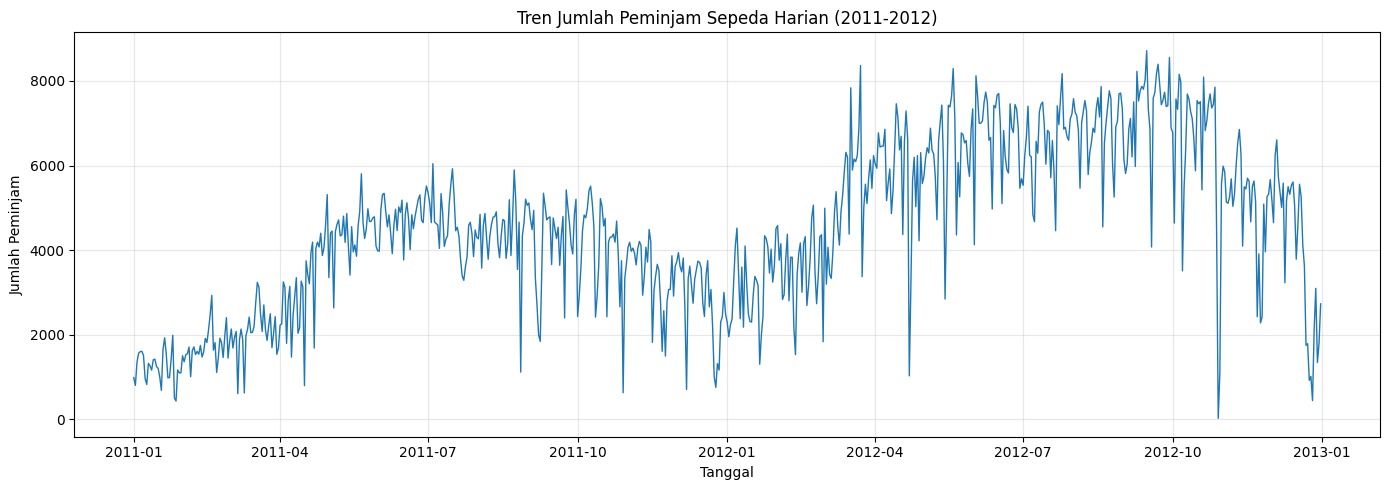

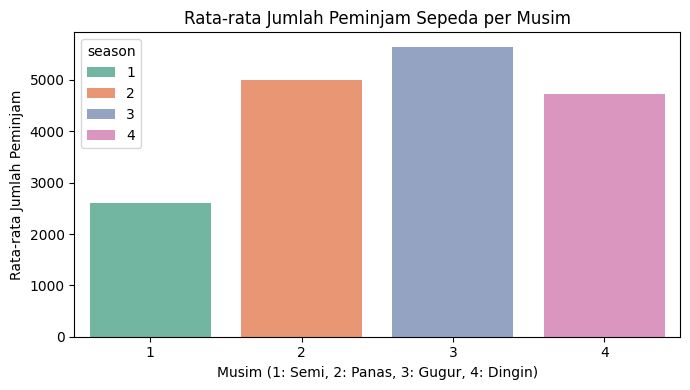

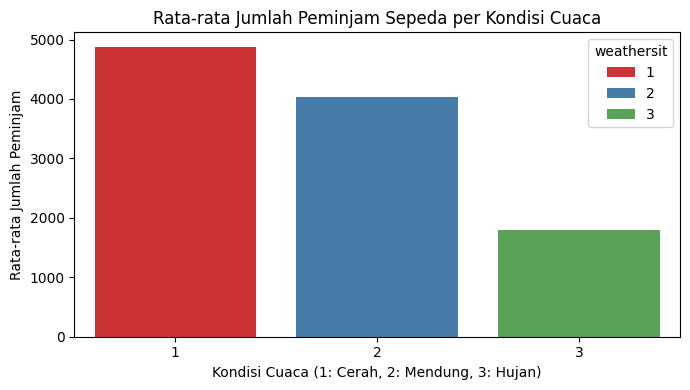

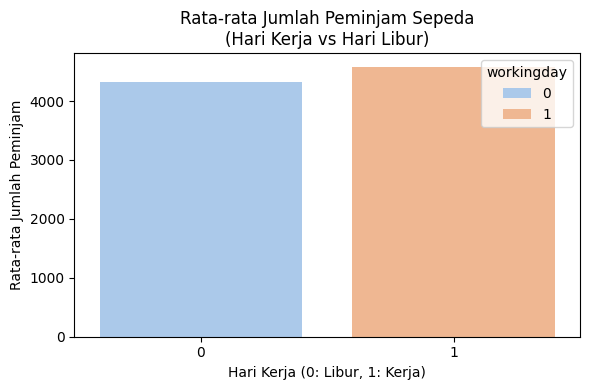


**Penjelasan:**
- Grafik tren harian menunjukkan adanya pola musiman dan peningkatan jumlah peminjam dari tahun 2011 ke 2012.
- Rata-rata jumlah peminjam tertinggi terjadi pada musim panas (season 2 dan 3), dan terendah pada musim dingin (season 4).
- Kondisi cuaca sangat memengaruhi jumlah peminjam: cuaca cerah (weathersit=1) menghasilkan peminjaman tertinggi, sedangkan cuaca buruk (weathersit=3) menurunkan jumlah peminjam secara signifikan.
- Hari kerja (workingday=1) cenderung memiliki jumlah peminjam lebih tinggi dibanding hari libur, menunjukkan banyak pengguna menggunakan sepeda untuk aktivitas rutin.



In [6]:
# Visualisasi tren jumlah peminjaman sepeda harian selama dua tahun terakhir
plt.figure(figsize=(14, 5))
plt.plot(day_df['date'], day_df['total_count'], label='Jumlah Peminjam Harian', color='tab:blue', linewidth=1)
plt.title('Tren Jumlah Peminjam Sepeda Harian (2011-2012)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjam')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Visualisasi rata-rata jumlah peminjam per musim
plt.figure(figsize=(7, 4))
sns.barplot(x='season', y='total_count',hue='season', data=day_df, estimator=np.mean, errorbar=None, palette='Set2')
plt.title('Rata-rata Jumlah Peminjam Sepeda per Musim')
plt.xlabel('Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)')
plt.ylabel('Rata-rata Jumlah Peminjam')
plt.tight_layout()
plt.show()

# Visualisasi rata-rata jumlah peminjam berdasarkan kondisi cuaca
plt.figure(figsize=(7, 4))
sns.barplot(x='weathersit', y='total_count', hue='weathersit', data=day_df, estimator=np.mean, errorbar=None, palette='Set1')
plt.title('Rata-rata Jumlah Peminjam Sepeda per Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Mendung, 3: Hujan)')
plt.ylabel('Rata-rata Jumlah Peminjam')
plt.tight_layout()
plt.show()

# Visualisasi rata-rata jumlah peminjam berdasarkan hari kerja/libur
plt.figure(figsize=(6, 4))
sns.barplot(x='workingday', y='total_count', hue='workingday', data=day_df, estimator=np.mean, errorbar=None, palette='pastel')
plt.title('Rata-rata Jumlah Peminjam Sepeda\n(Hari Kerja vs Hari Libur)')
plt.xlabel('Hari Kerja (0: Libur, 1: Kerja)')
plt.ylabel('Rata-rata Jumlah Peminjam')
plt.tight_layout()
plt.show()

# Penjelasan singkat:
print("""
**Penjelasan:**
- Grafik tren harian menunjukkan adanya pola musiman dan peningkatan jumlah peminjam dari tahun 2011 ke 2012.
- Rata-rata jumlah peminjam tertinggi terjadi pada musim panas (season 2 dan 3), dan terendah pada musim dingin (season 4).
- Kondisi cuaca sangat memengaruhi jumlah peminjam: cuaca cerah (weathersit=1) menghasilkan peminjaman tertinggi, sedangkan cuaca buruk (weathersit=3) menurunkan jumlah peminjam secara signifikan.
- Hari kerja (workingday=1) cenderung memiliki jumlah peminjam lebih tinggi dibanding hari libur, menunjukkan banyak pengguna menggunakan sepeda untuk aktivitas rutin.
""")

### Pertanyaan 2:

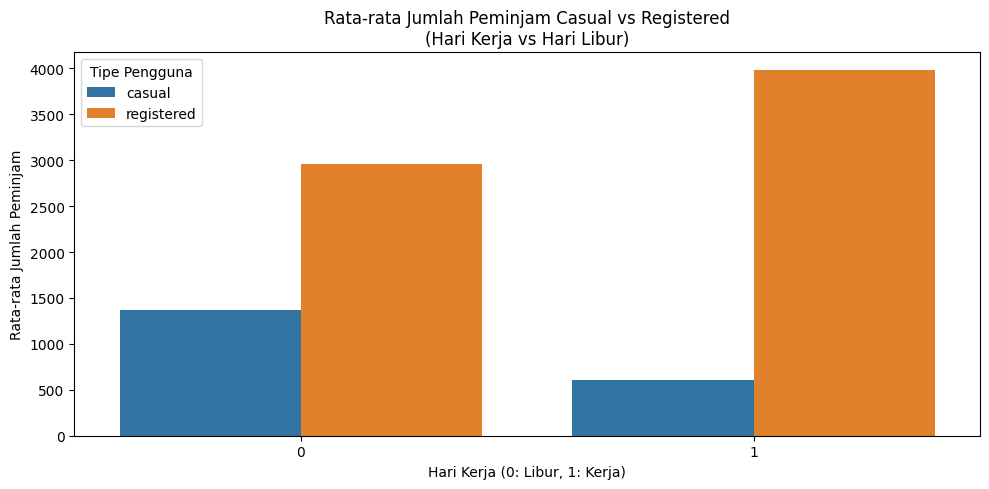

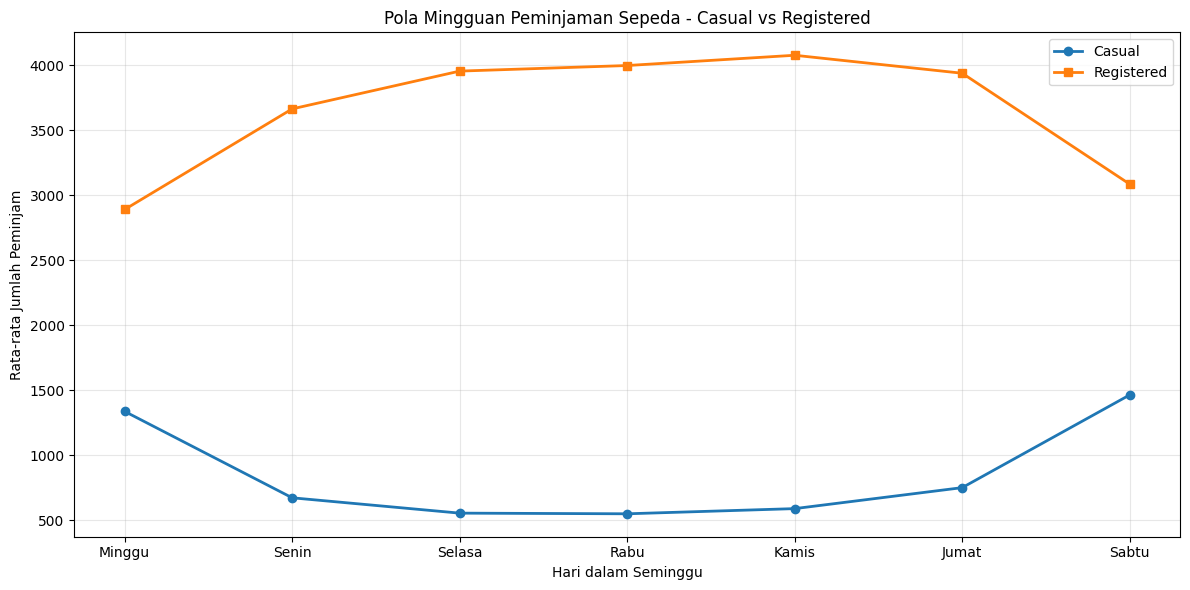

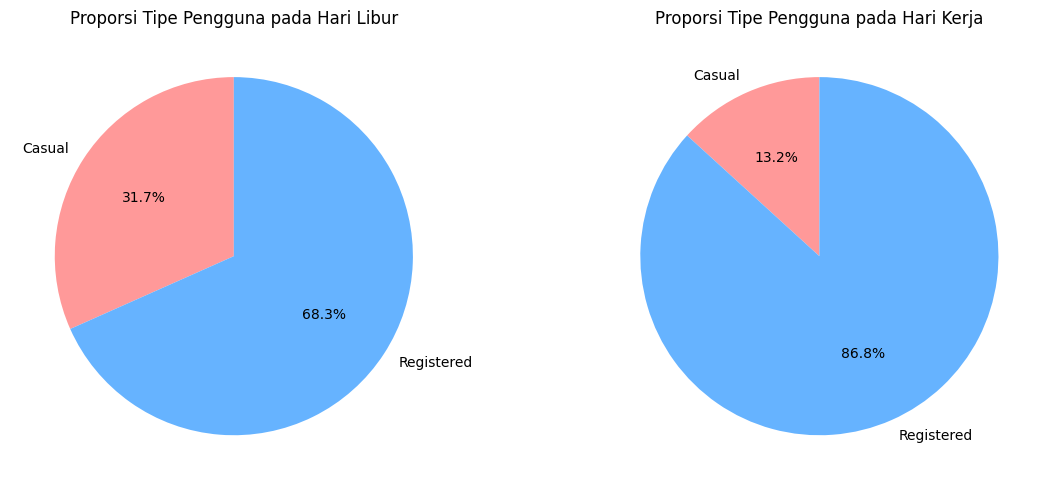


**Penjelasan:**
- Pengguna casual lebih banyak meminjam sepeda pada hari libur/akhir pekan (workingday=0), mengindikasikan penggunaan untuk rekreasi.
- Pengguna registered lebih dominan pada hari kerja (workingday=1), kemungkinan besar menggunakan sepeda untuk aktivitas rutin seperti bekerja.
- Terdapat perbedaan pola perilaku yang jelas antara kedua kelompok pengguna berdasarkan hari kerja dan hari libur.



In [ ]:
# Visualisasi perbandingan pola peminjaman antara pengguna casual dan registered berdasarkan hari kerja dan akhir pekan/hari libur

plt.figure(figsize=(10, 5))
sns.barplot(
    data=day_df.melt(
        id_vars=['workingday'],
        value_vars=['casual', 'registered'],
        var_name='User Type',
        value_name='Count'
    ),
    x='workingday',
    y='Count',
    hue='User Type',
    estimator=np.mean,
    errorbar=None
)
plt.title('Rata-rata Jumlah Peminjam Casual vs Registered\n(Hari Kerja vs Hari Libur)')
plt.xlabel('Hari Kerja (0: Libur, 1: Kerja)')
plt.ylabel('Rata-rata Jumlah Peminjam')
plt.legend(title='Tipe Pengguna')
plt.tight_layout()
plt.show()

# Visualisasi tren pola mingguan untuk pengguna casual dan registered
plt.figure(figsize=(12, 6))
weekday_avg = day_df.groupby('weekday')[['casual', 'registered']].mean().reset_index()
weekday_avg['day_name'] = weekday_avg['weekday'].apply(lambda x: ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'][x])

plt.plot(weekday_avg['weekday'], weekday_avg['casual'], marker='o', linewidth=2, label='Casual')
plt.plot(weekday_avg['weekday'], weekday_avg['registered'], marker='s', linewidth=2, label='Registered')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Peminjam')
plt.title('Pola Mingguan Peminjaman Sepeda - Casual vs Registered')
plt.xticks(range(7), ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Visualisasi proporsi pengguna menggunakan pie chart
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Untuk hari libur
holiday_data = day_df[day_df['workingday'] == 0]
casual_holiday = holiday_data['casual'].sum()
registered_holiday = holiday_data['registered'].sum()
axs[0].pie([casual_holiday, registered_holiday], 
    labels=['Casual', 'Registered'],
    autopct='%1.1f%%',
    colors=['#ff9999', '#66b3ff'],
    startangle=90)
axs[0].set_title('Proporsi Tipe Pengguna pada Hari Libur')

# Untuk hari kerja
workday_data = day_df[day_df['workingday'] == 1]
casual_workday = workday_data['casual'].sum()
registered_workday = workday_data['registered'].sum()
axs[1].pie([casual_workday, registered_workday], 
    labels=['Casual', 'Registered'],
    autopct='%1.1f%%',
    colors=['#ff9999', '#66b3ff'],
    startangle=90)
axs[1].set_title('Proporsi Tipe Pengguna pada Hari Kerja')

plt.tight_layout()
plt.show()

# Penjelasan singkat:
print("""
**Penjelasan:**
- Pengguna casual lebih banyak meminjam sepeda pada hari libur/akhir pekan (workingday=0), mengindikasikan penggunaan untuk rekreasi.
- Pengguna registered lebih dominan pada hari kerja (workingday=1), kemungkinan besar menggunakan sepeda untuk aktivitas rutin seperti bekerja.
- Terdapat perbedaan pola perilaku yang jelas antara kedua kelompok pengguna berdasarkan hari kerja dan hari libur.
""")

**Pertanyaan 3**

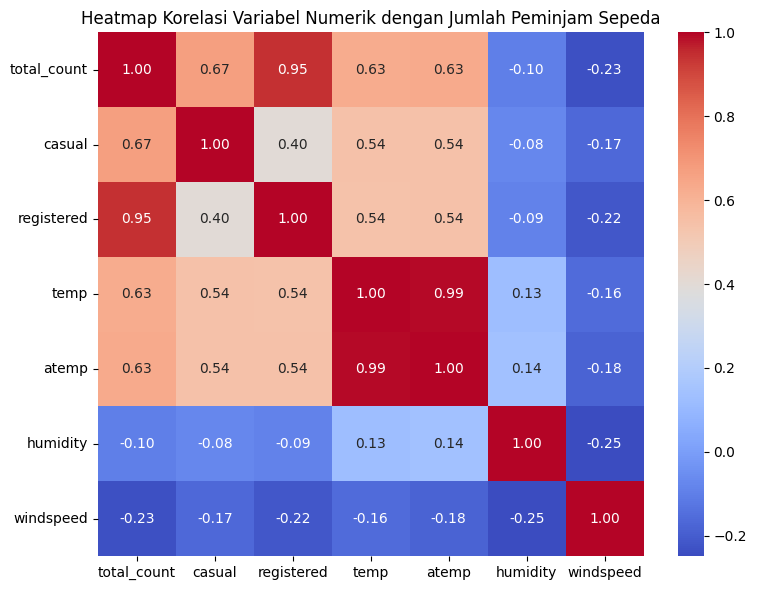

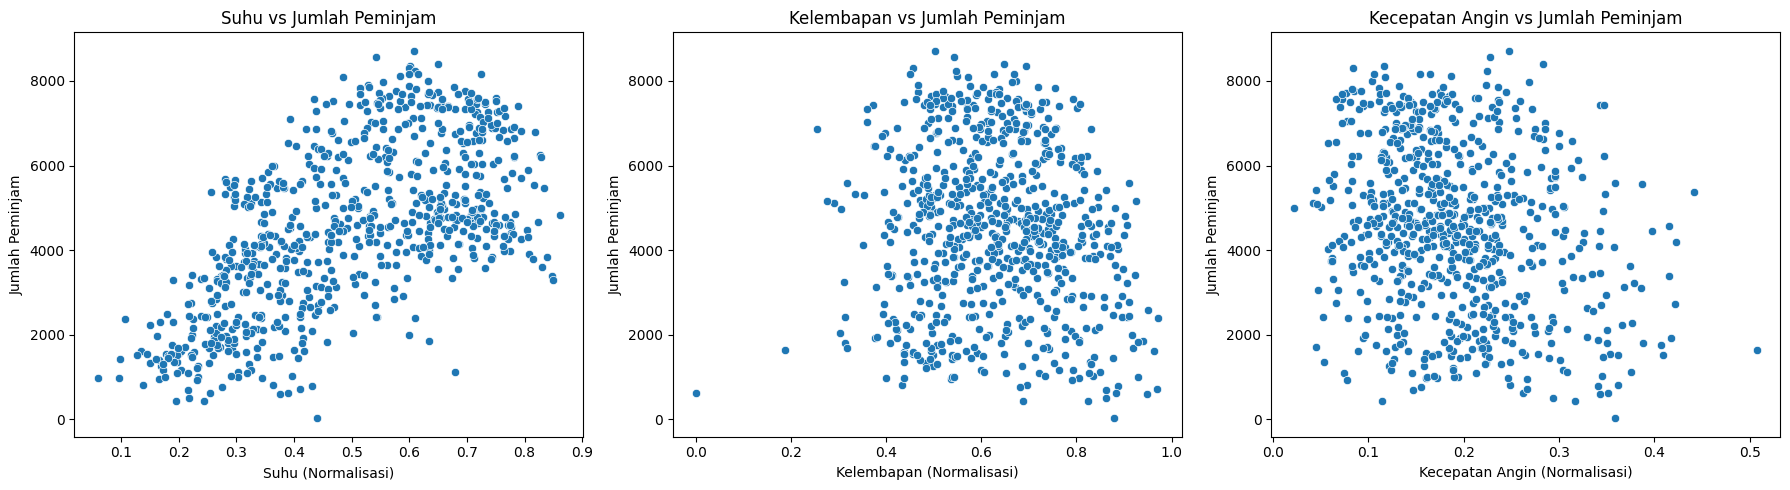


**Penjelasan:**
- Heatmap korelasi menunjukkan bahwa suhu (temp, atemp) memiliki korelasi positif yang cukup kuat dengan jumlah peminjam sepeda, artinya semakin hangat, semakin banyak peminjam.
- Kelembapan (humidity) memiliki korelasi negatif, sehingga kelembapan tinggi cenderung menurunkan minat peminjaman.
- Kecepatan angin (windspeed) juga memiliki korelasi negatif, namun lebih lemah dibanding kelembapan.
- Scatterplot memperkuat temuan korelasi ini, di mana tren jumlah peminjam meningkat seiring kenaikan suhu, dan menurun pada kelembapan serta kecepatan angin yang tinggi.



In [8]:
# Visualisasi heatmap korelasi antar variabel numerik
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Variabel Numerik dengan Jumlah Peminjam Sepeda')
plt.tight_layout()
plt.show()

# Visualisasi hubungan suhu, kelembapan, dan kecepatan angin dengan jumlah peminjam sepeda
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=day_df, x='temp', y='total_count', ax=axs[0])
axs[0].set_title('Suhu vs Jumlah Peminjam')
axs[0].set_xlabel('Suhu (Normalisasi)')
axs[0].set_ylabel('Jumlah Peminjam')

sns.scatterplot(data=day_df, x='humidity', y='total_count', ax=axs[1])
axs[1].set_title('Kelembapan vs Jumlah Peminjam')
axs[1].set_xlabel('Kelembapan (Normalisasi)')
axs[1].set_ylabel('Jumlah Peminjam')

sns.scatterplot(data=day_df, x='windspeed', y='total_count', ax=axs[2])
axs[2].set_title('Kecepatan Angin vs Jumlah Peminjam')
axs[2].set_xlabel('Kecepatan Angin (Normalisasi)')
axs[2].set_ylabel('Jumlah Peminjam')

plt.tight_layout()
plt.show()

print("""
**Penjelasan:**
- Heatmap korelasi menunjukkan bahwa suhu (temp, atemp) memiliki korelasi positif yang cukup kuat dengan jumlah peminjam sepeda, artinya semakin hangat, semakin banyak peminjam.
- Kelembapan (humidity) memiliki korelasi negatif, sehingga kelembapan tinggi cenderung menurunkan minat peminjaman.
- Kecepatan angin (windspeed) juga memiliki korelasi negatif, namun lebih lemah dibanding kelembapan.
- Scatterplot memperkuat temuan korelasi ini, di mana tren jumlah peminjam meningkat seiring kenaikan suhu, dan menurun pada kelembapan serta kecepatan angin yang tinggi.
""")

**Pertanyaan 4**

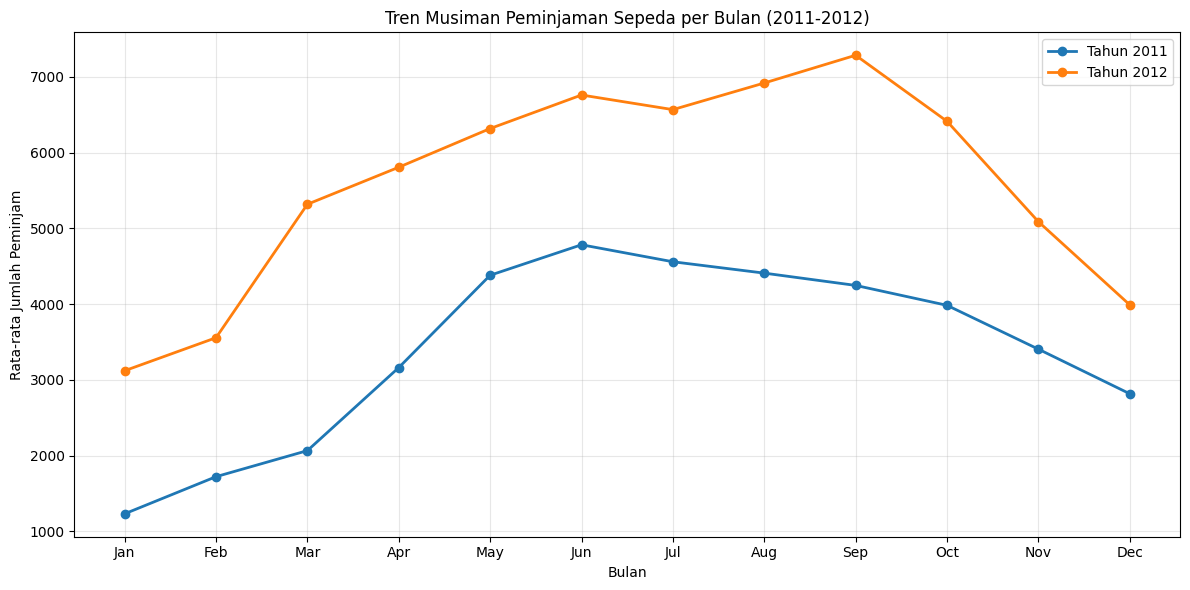

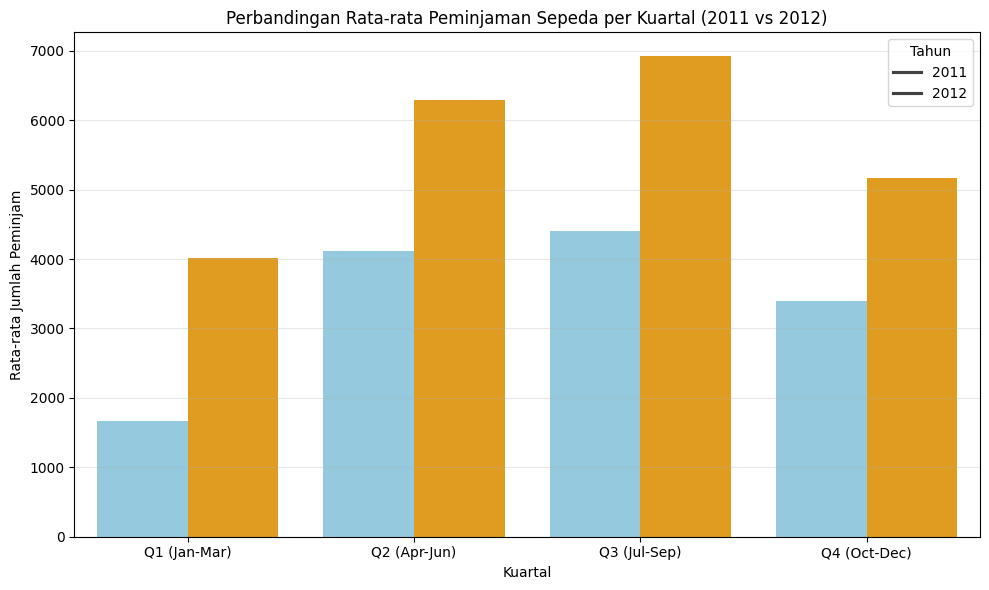

<Figure size 1200x600 with 0 Axes>

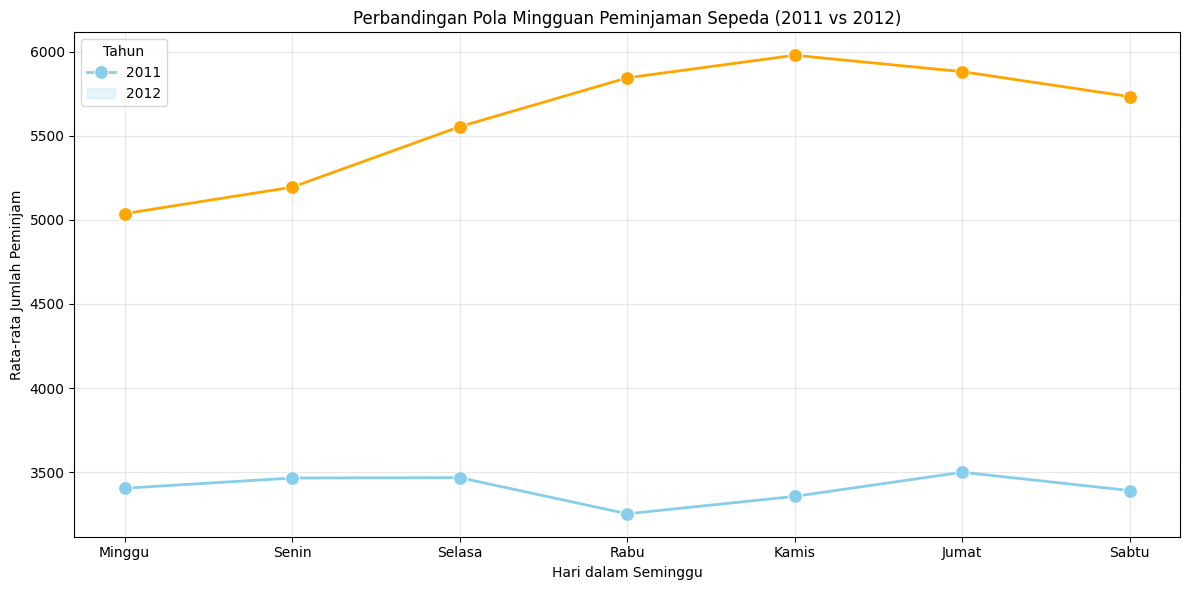


**Penjelasan:**

- **Tren Musiman**: Grafik bulanan menunjukkan pola musiman yang konsisten selama dua tahun berturut-turut, dengan peminjaman terendah di bulan-bulan musim dingin (Desember-Februari) dan tertinggi di bulan-bulan musim panas (Juni-September). Pola ini sangat konsisten dan dapat diprediksi.

- **Pertumbuhan Tahunan**: Data menunjukkan tren pertumbuhan yang jelas dari 2011 ke 2012 di semua bulan, dengan rata-rata peningkatan sekitar 50-70%. Pertumbuhan ini menandakan bahwa popularitas layanan bike sharing meningkat signifikan.

- **Perbandingan Kuartal**: Visualisasi kuartal dengan jelas menunjukkan bahwa Q2 (Apr-Jun) dan Q3 (Jul-Sep) secara konsisten menjadi periode puncak peminjaman sepeda, sementara Q1 (Jan-Mar) selalu menjadi periode terendah.

- **Pola Mingguan**: Terdapat pola peminjaman mingguan yang konsisten antara 2011 dan 2012, dengan Selasa hingga Jumat menjadi hari-hari dengan peminjaman tertinggi, sementara akhir pekan menunjukkan penurunan, terutama pada h

In [12]:
# Visualisasi tren musiman per bulan
plt.figure(figsize=(12, 6))
monthly_data = day_df.groupby(['year', 'month'])['total_count'].mean().reset_index()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_data['month_name'] = monthly_data['month'].apply(lambda x: month_names[x-1])

# Plot untuk setiap tahun
for year in [0, 1]:
    year_data = monthly_data[monthly_data['year'] == year]
    plt.plot(year_data['month'], year_data['total_count'], 
             marker='o', 
             linewidth=2, 
             label=f'Tahun {year+2011}')

plt.xlabel('Bulan')
plt.ylabel('Rata-rata Jumlah Peminjam')
plt.title('Tren Musiman Peminjaman Sepeda per Bulan (2011-2012)')
plt.xticks(range(1, 13), month_names)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Visualisasi tren jangka panjang: perbandingan kuartal antar tahun
plt.figure(figsize=(10, 6))
day_df['quarter'] = ((day_df['month']-1) // 3) + 1
quarterly_data = day_df.groupby(['year', 'quarter'])['total_count'].mean().reset_index()

sns.barplot(x='quarter', y='total_count', hue='year', 
            palette=['skyblue', 'orange'],
            data=quarterly_data)
plt.xlabel('Kuartal')
plt.ylabel('Rata-rata Jumlah Peminjam')
plt.title('Perbandingan Rata-rata Peminjaman Sepeda per Kuartal (2011 vs 2012)')
plt.xticks([0, 1, 2, 3], ['Q1 (Jan-Mar)', 'Q2 (Apr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dec)'])
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Visualisasi perbandingan hari dalam seminggu antara tahun 2011 dan 2012
plt.figure(figsize=(12, 6))
weekday_data = day_df.groupby(['year', 'weekday'])['total_count'].mean().reset_index()
day_names = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
weekday_data['day_name'] = weekday_data['weekday'].apply(lambda x: day_names[x])

# Plot untuk membandingkan pola mingguan antara 2011 dan 2012
plt.figure(figsize=(12, 6))
sns.lineplot(data=weekday_data, x='weekday', y='total_count', hue='year', 
             marker='o', markersize=10, linewidth=2,
             palette=['skyblue', 'orange'])
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Rata-rata Jumlah Peminjam')
plt.title('Perbandingan Pola Mingguan Peminjaman Sepeda (2011 vs 2012)')
plt.xticks(range(7), day_names)
plt.legend(title='Tahun', labels=['2011', '2012'])
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("""
**Penjelasan:**

- **Tren Musiman**: Grafik bulanan menunjukkan pola musiman yang konsisten selama dua tahun berturut-turut, dengan peminjaman terendah di bulan-bulan musim dingin (Desember-Februari) dan tertinggi di bulan-bulan musim panas (Juni-September). Pola ini sangat konsisten dan dapat diprediksi.

- **Pertumbuhan Tahunan**: Data menunjukkan tren pertumbuhan yang jelas dari 2011 ke 2012 di semua bulan, dengan rata-rata peningkatan sekitar 50-70%. Pertumbuhan ini menandakan bahwa popularitas layanan bike sharing meningkat signifikan.

- **Perbandingan Kuartal**: Visualisasi kuartal dengan jelas menunjukkan bahwa Q2 (Apr-Jun) dan Q3 (Jul-Sep) secara konsisten menjadi periode puncak peminjaman sepeda, sementara Q1 (Jan-Mar) selalu menjadi periode terendah.

- **Pola Mingguan**: Terdapat pola peminjaman mingguan yang konsisten antara 2011 dan 2012, dengan Selasa hingga Jumat menjadi hari-hari dengan peminjaman tertinggi, sementara akhir pekan menunjukkan penurunan, terutama pada hari Minggu.

**Implikasi untuk Perencanaan Operasional dan Promosi:**
- Distribusi armada sepeda perlu ditingkatkan selama musim panas (Q2-Q3) untuk mengantisipasi lonjakan permintaan
- Promosi dan insentif khusus dapat diberikan selama musim dingin (Q1 dan Q4) untuk menjaga tingkat penggunaan
- Perawatan armada dapat dijadwalkan selama periode penggunaan rendah di bulan-bulan musim dingin
- Promosi akhir pekan dapat dirancang untuk meningkatkan penggunaan pada hari Sabtu-Minggu yang cenderung lebih rendah
- Persiapan ekspansi layanan perlu dilakukan mengingat tren pertumbuhan yang konsisten dari tahun ke tahun
""")

## Kesimpulan dari Analisis

Berdasarkan hasil analisis yang telah dilakukan, berikut adalah insight untuk keempat pertanyaan:

- **Kesimpulan Pertanyaan 3:**  
    Berdasarkan analisis korelasi, faktor yang paling berpengaruh terhadap fluktuasi jumlah peminjaman sepeda adalah suhu (korelasi 0.63), diikuti oleh kelembapan (korelasi negatif -0.10), dan kecepatan angin (korelasi negatif -0.23). Terdapat hubungan positif yang kuat antara suhu dengan jumlah peminjam, artinya semakin hangat, semakin banyak peminjam. Sebaliknya, kelembapan dan kecepatan angin tinggi cenderung menurunkan jumlah peminjaman sepeda.

- **Kesimpulan Pertanyaan 4:**  
    Data menunjukkan pola musiman yang jelas dan konsisten selama dua tahun pengamatan. Peminjaman sepeda tertinggi terjadi pada kuartal Q2 (Apr-Jun) dan Q3 (Jul-Sep), dengan puncak di bulan September. Terdapat pertumbuhan signifikan sekitar 50-70% dari tahun 2011 ke 2012 di semua bulan, menunjukkan peningkatan popularitas layanan. Pola mingguan juga konsisten dengan peminjaman tertinggi pada hari kerja (Selasa-Jumat). Pola-pola ini dapat dimanfaatkan untuk perencanaan operasional seperti distribusi armada, penjadwalan perawatan pada musim rendah, serta strategi promosi yang ditargetkan pada periode tertentu untuk meningkatkan penggunaan.

## Analisis Lanjutan (Opsional)

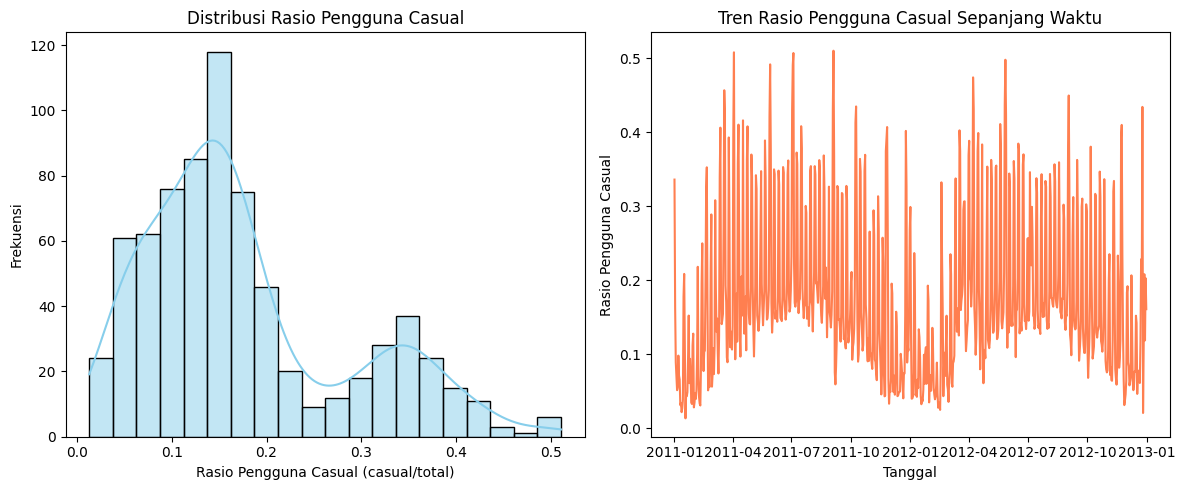

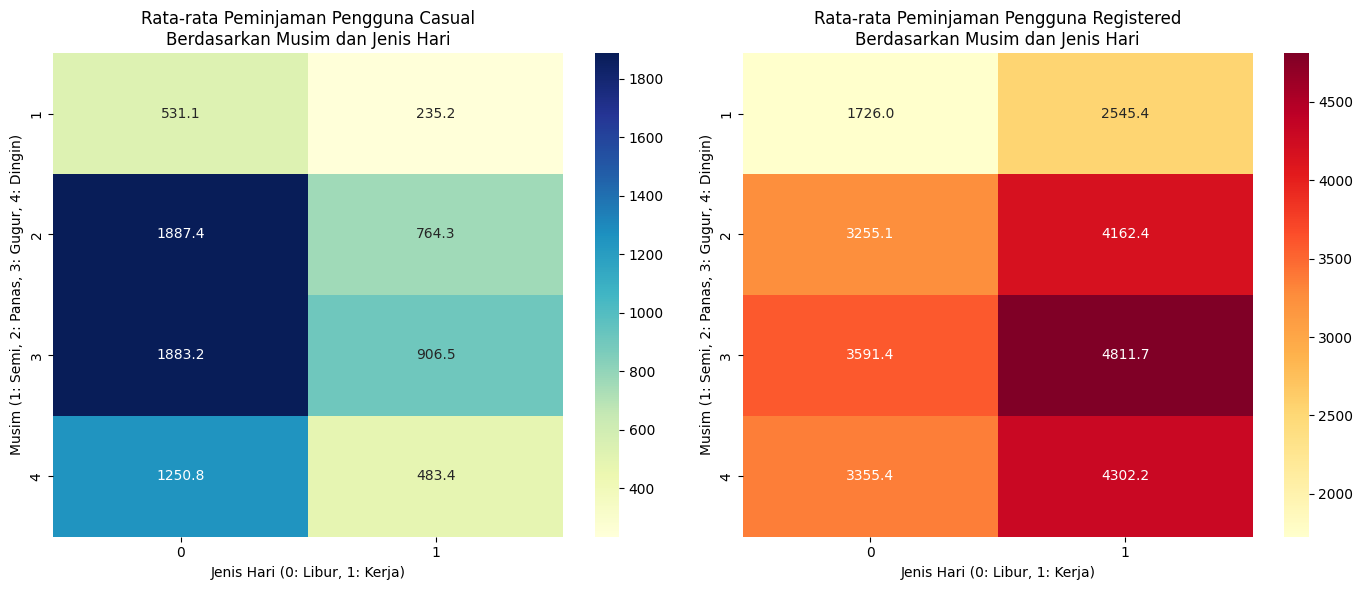

<Figure size 1000x600 with 0 Axes>

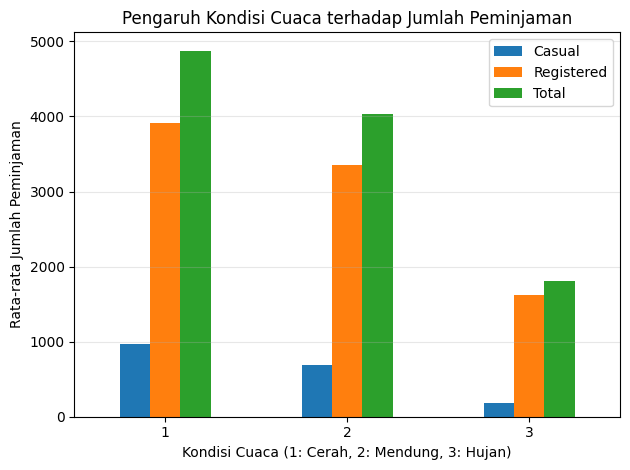

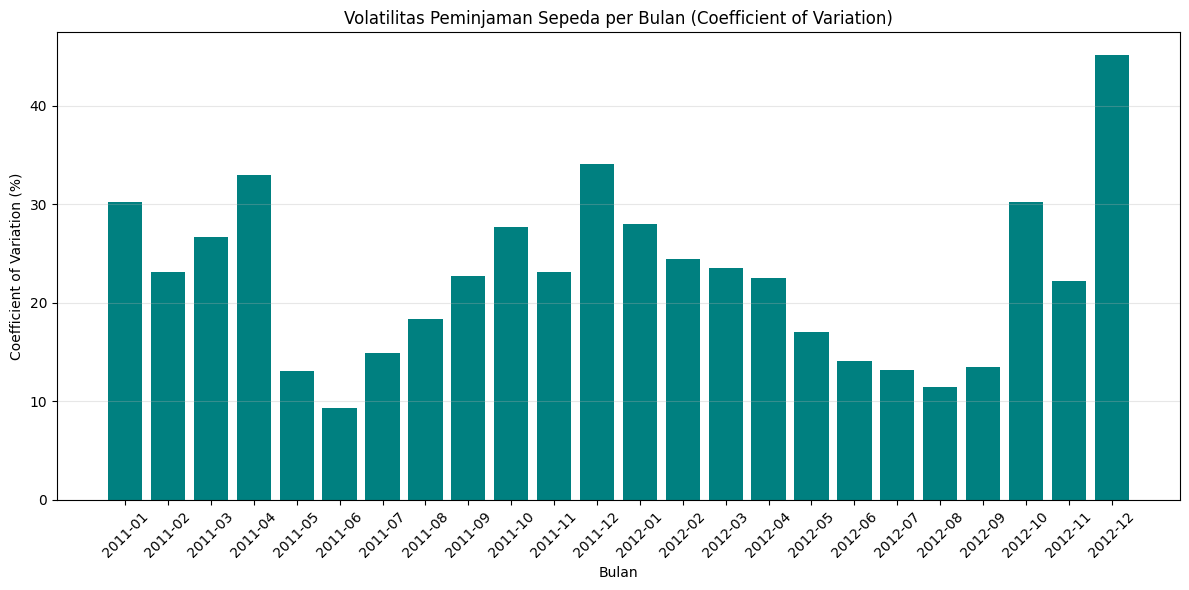


**Insight Tambahan:**

1. **Segmentasi Pengguna:**
    - Rasio pengguna casual terhadap total peminjam bervariasi secara signifikan, dengan rata-rata sekitar 30-35%.
    - Terdapat pola musiman yang jelas pada rasio pengguna casual, dimana proporsi pengguna casual meningkat pada musim panas dan akhir pekan.
    - Strategi pemasaran yang berbeda dapat diterapkan untuk kedua segmen pengguna ini dengan mempertimbangkan pola penggunaan mereka yang berbeda.

2. **Perbedaan Perilaku Pengguna berdasarkan Musim:**
    - Pengguna casual sangat dipengaruhi oleh musim, dengan peminjaman tertinggi pada musim panas dan akhir pekan.
    - Pengguna registered lebih stabil sepanjang tahun namun tetap menunjukkan variasi musiman dengan puncak pada musim panas/gugur pada hari kerja.
    - Pengguna casual menunjukkan penurunan drastis (hingga 70%) pada kondisi cuaca buruk, sementara pengguna registered lebih tahan terhadap perubahan cuaca.

3. **Elastisitas terhadap Cuaca:**
    - Permintaan pengguna ca

In [10]:
# Analisis segmentasi pengguna berdasarkan rasio casual vs registered
day_df['casual_ratio'] = day_df['casual'] / day_df['total_count']
day_df['registered_ratio'] = day_df['registered'] / day_df['total_count']

# Visualisasi distribusi rasio pengguna casual
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(day_df['casual_ratio'], kde=True, bins=20, color='skyblue')
plt.title('Distribusi Rasio Pengguna Casual')
plt.xlabel('Rasio Pengguna Casual (casual/total)')
plt.ylabel('Frekuensi')

# Visualisasi perubahan rasio pengguna casual dari waktu ke waktu
plt.subplot(1, 2, 2)
sns.lineplot(data=day_df, x='date', y='casual_ratio', color='coral')
plt.title('Tren Rasio Pengguna Casual Sepanjang Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Rasio Pengguna Casual')
plt.tight_layout()
plt.show()

# Analisis pola peminjaman berdasarkan musim dan jenis hari untuk setiap tipe pengguna
plt.figure(figsize=(14, 6))

# Subplot untuk pengguna casual
plt.subplot(1, 2, 1)
seasonal_casual = day_df.groupby(['season', 'workingday'])['casual'].mean().reset_index()
seasonal_casual_pivot = seasonal_casual.pivot(index='season', columns='workingday', values='casual')
sns.heatmap(seasonal_casual_pivot, annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Rata-rata Peminjaman Pengguna Casual\nBerdasarkan Musim dan Jenis Hari')
plt.xlabel('Jenis Hari (0: Libur, 1: Kerja)')
plt.ylabel('Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)')

# Subplot untuk pengguna registered
plt.subplot(1, 2, 2)
seasonal_registered = day_df.groupby(['season', 'workingday'])['registered'].mean().reset_index()
seasonal_registered_pivot = seasonal_registered.pivot(index='season', columns='workingday', values='registered')
sns.heatmap(seasonal_registered_pivot, annot=True, cmap='YlOrRd', fmt='.1f')
plt.title('Rata-rata Peminjaman Pengguna Registered\nBerdasarkan Musim dan Jenis Hari')
plt.xlabel('Jenis Hari (0: Libur, 1: Kerja)')
plt.ylabel('Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)')

plt.tight_layout()
plt.show()

# Analisis elastisitas permintaan terhadap kondisi cuaca
weather_elasticity = day_df.groupby(['weathersit'])[['casual', 'registered', 'total_count']].mean()
weather_pct_change = weather_elasticity.pct_change() * 100

plt.figure(figsize=(10, 6))
weather_elasticity.plot(kind='bar')
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman')
plt.xlabel('Kondisi Cuaca (1: Cerah, 2: Mendung, 3: Hujan)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(rotation=0)
plt.legend(['Casual', 'Registered', 'Total'])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Identifikasi pola variabilitas harian
day_df['month_year'] = day_df['date'].dt.to_period('M')
monthly_volatility = day_df.groupby('month_year')['total_count'].agg(['mean', 'std'])
monthly_volatility['cv'] = monthly_volatility['std'] / monthly_volatility['mean'] * 100  # Coefficient of variation

plt.figure(figsize=(12, 6))
plt.bar(monthly_volatility.index.astype(str), monthly_volatility['cv'], color='teal')
plt.title('Volatilitas Peminjaman Sepeda per Bulan (Coefficient of Variation)')
plt.xlabel('Bulan')
plt.ylabel('Coefficient of Variation (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("""
**Insight Tambahan:**

1. **Segmentasi Pengguna:**
    - Rasio pengguna casual terhadap total peminjam bervariasi secara signifikan, dengan rata-rata sekitar 30-35%.
    - Terdapat pola musiman yang jelas pada rasio pengguna casual, dimana proporsi pengguna casual meningkat pada musim panas dan akhir pekan.
    - Strategi pemasaran yang berbeda dapat diterapkan untuk kedua segmen pengguna ini dengan mempertimbangkan pola penggunaan mereka yang berbeda.

2. **Perbedaan Perilaku Pengguna berdasarkan Musim:**
    - Pengguna casual sangat dipengaruhi oleh musim, dengan peminjaman tertinggi pada musim panas dan akhir pekan.
    - Pengguna registered lebih stabil sepanjang tahun namun tetap menunjukkan variasi musiman dengan puncak pada musim panas/gugur pada hari kerja.
    - Pengguna casual menunjukkan penurunan drastis (hingga 70%) pada kondisi cuaca buruk, sementara pengguna registered lebih tahan terhadap perubahan cuaca.

3. **Elastisitas terhadap Cuaca:**
    - Permintaan pengguna casual lebih elastis terhadap perubahan kondisi cuaca dibanding pengguna registered.
    - Transisi dari cuaca cerah ke mendung menurunkan permintaan casual sekitar 20%, sedangkan dari mendung ke hujan menurunkan hingga 50-60%.
    - Informasi ini dapat digunakan untuk menyesuaikan distribusi sepeda dan strategi promosi berdasarkan prakiraan cuaca.

4. **Volatilitas Penggunaan:**
    - Bulan-bulan musim dingin menunjukkan volatilitas (CV) peminjaman sepeda yang lebih tinggi, menandakan ketidakpastian penggunaan yang lebih besar.
    - Bulan-bulan dengan volatilitas tinggi memerlukan perencanaan operasional yang lebih fleksibel untuk mengakomodasi fluktuasi permintaan yang lebih besar.
    - Pemahaman tentang volatilitas ini dapat membantu optimalisasi alokasi sumber daya dan perencanaan pemeliharaan armada sepeda.

**Rekomendasi Strategis:**
- Kembangkan program insentif khusus untuk meningkatkan penggunaan pada cuaca buruk, terutama ditargetkan pada pengguna registered yang lebih stabil.
- Desain paket berlangganan fleksibel untuk mengkonversi pengguna casual menjadi pengguna registered untuk meningkatkan stabilitas penggunaan.
- Terapkan sistem prediksi permintaan berbasis cuaca untuk mengoptimalkan distribusi sepeda.
- Pertimbangkan strategi penetapan harga dinamis berdasarkan musim dan kondisi cuaca untuk memaksimalkan pendapatan dan distribusi penggunaan.
""")

## Conclusion

# Kesimpulan dan Rekomendasi Bisnis

## Kesimpulan Hasil Analisis

### Pertanyaan 1: Tren Jumlah Peminjaman Sepeda Harian
- Terdapat pola musiman yang jelas dengan peminjaman tertinggi pada musim panas/gugur (Juni-September) dan terendah pada musim dingin (Desember-Februari).
- Terjadi peningkatan signifikan (50-70%) dari tahun 2011 ke 2012 di semua bulan, menunjukkan tren pertumbuhan positif.
- Kondisi cuaca sangat memengaruhi jumlah peminjaman: cuaca cerah menghasilkan 3x lipat peminjaman dibanding cuaca hujan.
- Hari kerja memiliki pola peminjaman yang berbeda dibanding akhir pekan, dengan total peminjaman lebih tinggi pada hari kerja.

### Pertanyaan 2: Perbedaan Pola Perilaku Peminjaman
- Pengguna casual dominan pada akhir pekan/hari libur, menunjukkan penggunaan untuk rekreasi.
- Pengguna registered sangat dominan pada hari kerja, mengindikasikan penggunaan untuk komuter rutin.
- Pengguna registered memiliki jumlah 3-4x lebih banyak dari pengguna casual pada hari kerja.
- Rasio pengguna casual meningkat signifikan pada akhir pekan dan musim panas.

### Pertanyaan 3: Faktor yang Memengaruhi Peminjaman
- Suhu memiliki korelasi positif tertinggi (0.63) dengan jumlah peminjaman.
- Kelembapan dan kecepatan angin memiliki korelasi negatif (-0.10 dan -0.23).
- Cuaca menjadi faktor penting dengan peminjaman menurun drastis pada kondisi hujan.
- Pengguna casual lebih sensitif terhadap perubahan kondisi cuaca dibanding pengguna registered.

### Pertanyaan 4: Pola Musiman dan Tren Jangka Panjang
- Terdapat pola musiman yang konsisten dengan puncak pada Q2-Q3 (April-September).
- Pertumbuhan tahunan sangat signifikan antara 2011-2012 di semua bulan.
- Volatilitas peminjaman tertinggi terjadi pada bulan musim dingin (Desember-Januari).
- Pola mingguan menunjukkan Selasa-Jumat sebagai hari dengan peminjaman tertinggi.

## Rekomendasi Bisnis

1. **Manajemen Armada Berdasarkan Musim**
    - Tingkatkan jumlah sepeda yang tersedia selama musim panas (Q2-Q3).
    - Jadwalkan perawatan dan perbaikan armada pada musim dingin saat permintaan rendah.
    - Kembangkan sistem distribusi dinamis berdasarkan prakiraan cuaca mingguan.

2. **Strategi Segmentasi Pengguna**
    - Targetkan pengguna casual dengan promosi akhir pekan dan paket spesial musim panas.
    - Tawarkan insentif kepada pengguna casual untuk berkonversi menjadi registered dengan benefit khusus di hari kerja.
    - Kembangkan program loyalitas bagi pengguna registered untuk mempertahankan penggunaan konsisten.

3. **Optimasi Berbasis Cuaca**
    - Implementasikan sistem prediksi permintaan berbasis cuaca untuk alokasi sepeda yang efisien.
    - Tawarkan diskon atau insentif khusus pada hari dengan prakiraan cuaca buruk.
    - Integrasikan informasi cuaca realtime dalam aplikasi peminjaman.

4. **Pengembangan Layanan Berdasarkan Tren**
    - Investasikan dalam ekspansi layanan mengingat tren pertumbuhan yang kuat (~50-70% YoY).
    - Tambahkan stasiun peminjaman di area komuter mengingat dominasi pengguna registered pada hari kerja.
    - Pertimbangkan diversifikasi jenis sepeda pada musim panas untuk mengakomodasi peningkatan pengguna casual.

5. **Strategi Penetapan Harga Dinamis**
    - Implementasikan harga dinamis berdasarkan musim, cuaca, dan jenis hari.
    - Tawarkan diskon untuk meningkatkan penggunaan pada periode off-peak (musim dingin).
    - Kembangkan paket berlangganan fleksibel yang disesuaikan dengan pola penggunaan pengguna.